In [2]:
import numpy as np
import scipy.integrate as ode
import random as rd
import matplotlib.pyplot as plt


Original oscillator:

$$
\frac{dmS}{dt} = \alpha_{S0} + \alpha_S \frac{H(t-\tau_H)^{n_1}}{K_H^{n_1} + H(t-\tau_H)^{n_1}} - \delta_m \cdot mS
$$

$$
\frac{dmH}{dt} = \alpha_{H0} + \alpha_H \frac{K_S^{n_2}}{K_S^{n_2} + S(t-\tau_S)^{n_2}} - \delta_m \cdot mH
$$

$$
\frac{dS}{dt} = \beta \cdot mS - \delta_S \cdot S
$$

$$
\frac{dH}{dt} = \beta \cdot mH - \delta_H \cdot H
$$

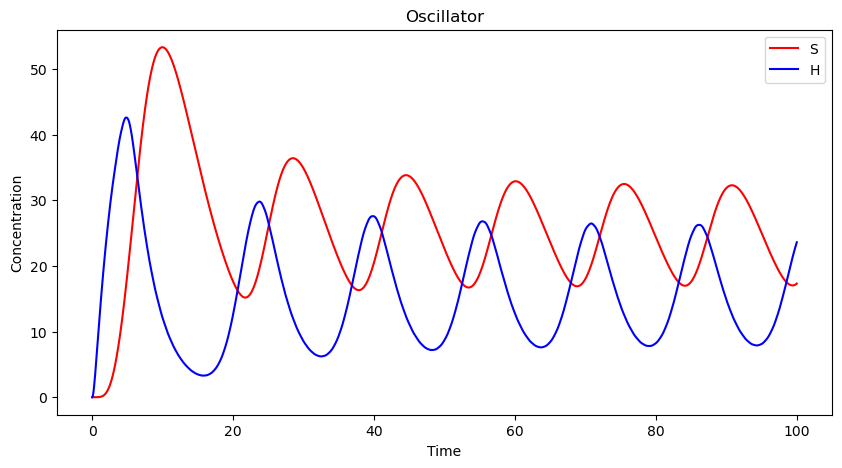

In [4]:
# the original oscillation (without delay)
def oscil_original(t,z):
    s,h,ms,mh=z
    as0=0.1
    ah0=0.1
    a_s=30.5
    ah=183
    kh=326
    ks=185
    dm=0.3
    dh=3.8
    ds=0.2
    n1=3
    n2=4.8
    b=3.7
    dmsdt=as0+a_s*(h**n1)/(kh**n1+h**n1)-dm*ms
    dmhdt=ah0+ah*(ks**n2)/(ks**n2+s**n2)-dm*mh
    dsdt=b*ms-ds*s
    dhdt=b*mh-dh*h
    return [dsdt, dhdt, dmsdt, dmhdt]
z0=[0,0,0,0]
time=100
timespan=[0,time]
results=ode.solve_ivp(oscil_original, timespan, z0, t_eval=np.linspace(0, time, time*100), method='RK45')
s=results.y[0]/10
h=results.y[1]/10
ms=results.y[2]
mh=results.y[3]
t=results.t
plt.figure(figsize=(10, 5))
plt.plot(t, s, label='S',color='red')
plt.plot(t, h, label='H',color='blue')
#plt.plot(t, ms, label='MS',color='green')
#plt.plot(t, mh, label='MH',color='orange')
plt.title('Oscillator')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.show()

New oscillator:

$$
\frac{dmS}{dt} = \alpha_{S0} + \frac{1}{2}\alpha_S (\frac{H^{n_1}}{K_H^{n_1} + H^{n_1}}+\frac{K_{ph}^{n_4}}{K_{ph}^{n_4}+P^{n_4}}) - \delta_m \cdot mS
$$

$$
\frac{dmH}{dt} = \alpha_{H0} + \alpha_H \frac{K_S^{n_2}}{K_S^{n_2} + S^{n_2}} - \delta_m \cdot mH
$$

$$
\frac{dS}{dt} = \beta \cdot mS - \delta_S \cdot S
$$

$$
\frac{dH}{dt} = \beta \cdot mH - \delta_H \cdot H
$$

$$
\frac{dmP}{dt} = \alpha_{P0} + \alpha_P \frac{K_P^{n_3}}{K_P^{n_3} + H^{n_3}} - \delta_m \cdot mP
$$

$$
\frac{dP}{dt} = \beta \cdot mP - \delta_P \cdot P
$$

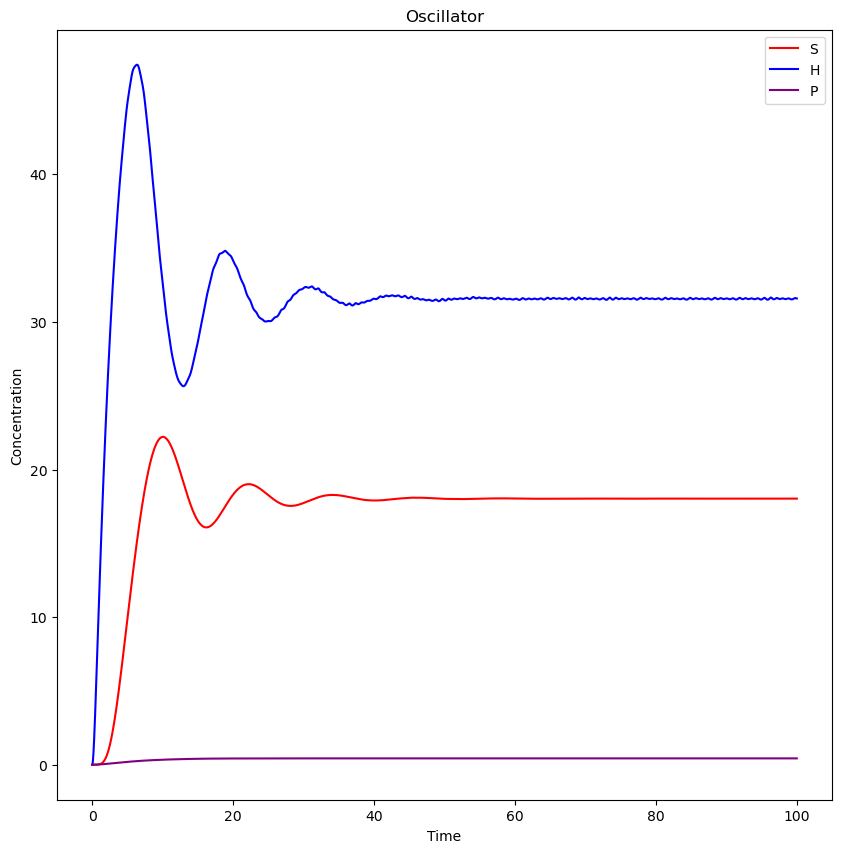

In [ ]:
def oscil_trial(t,z,params=[0.3, 300, 50, 300]):
    s,h,ms,mh,p,mp=z
    as0=0.1     
    ah0=0.1
    a_s=30.5
    ah=183
    kh=326
    ks=185
    dm=0.3
    dh=3.8
    ds=1        # 0.2
    n1=3
    n2=4.8
    b=3.7
    # new parameters to be explored
    dp, ap, kph, kp=params
    """ dp=0.3
    ap=300
    kph=50
    kp=300
    """
    n3=4.8
    n4=4.8
    ap0=0.1
    
    dmsdt=as0+a_s*((h**n1)/(kh**n1+h**n1)+kph**n4/(kp**n4+p**n4))-dm*ms
    dmhdt=ah0+ah*(ks**n2)/(ks**n2+s**n2)-dm*mh
    dsdt=b*ms-ds*s
    dhdt=b*mh-dh*h
    dpdt=b*mp-dp*p
    dmpdt=ap0+ap*(kp**n1)/(kp**n3+h**n3)-dm*mp
    return [dsdt, dhdt, dmsdt, dmhdt, dpdt, dmpdt]
z0=[0,0,0,0,0,0]
time=100
timespan=[0,time]
results=ode.solve_ivp(oscil_trial, timespan, z0, t_eval=np.linspace(0, time, time*100), method='RK45')
s=results.y[0]/10
h=results.y[1]/10
ms=results.y[2]
mh=results.y[3]
p=results.y[4]/10
mp=results.y[5]
t=results.t
plt.figure(figsize=(10, 10))
plt.plot(t, s, label='S',color='red')
plt.plot(t, h, label='H',color='blue')
#plt.plot(t, ms, label='MS',color='green')
#plt.plot(t, mh, label='MH',color='orange')
plt.plot(t, p, label='P',color='purple')
#plt.plot(t, mp, label='MP',color='brown')
plt.title('Oscillator')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.show()